# Trabalho Ciência de dados

<h4>Grupo:</h4>
<p>
    <br>Christopher Martins
    <br>Daniel Lopes
    <br>Douglas Gonçalves Sales
</p>

# Sobre a Linguagem

 O Python é uma linguagem interpretada de alto nível e foi escolhida pelo mérito acumulado ao longo de 28 anos de desenvolvimento.

<h4><strong>Facilidade de Aprendizado e de Uso:</strong></h4>
    <br>Python é uma linguagem de alto nível e de fácil aprendizado. Com isso, podemos começar a analisar os dados sem perder tempo descobrindo particularides da linguagem. De acordo com Stackoverflow, de 2018, o Python é a linguagem de programação mais popular do mundo, e é considerada uma linguagem para iniciantes, onde qualquer pessoa que possua um conhecimento básico de programação consegue utiliza-la.   
    
<h4><strong>Grande Comunidade:</strong></h4>
    <br>A linguagem é amplamente utilizada para ciência de dados, e possui uma comunidade expecialista e colaborativa. O problema que um utilizador novato de Python vivencia, provavelmente já foi resolvido por um outro usuário mais experiente.  
    
<h4><strong>Grande Número de Bibliotecas e Frameworks:</strong></h4> 
    <br>A linguagem Python possui uma enorme variablidade de bibliotecas, desde a mais básicas como expressões regulares até inteligência artificial e aprendizado ao homem máquina, conexões HTTP seguras, processamento de XML e HTML, bancos de dados, net scraping, etc.  

<h4><strong>Atualizada Constantemente:</strong></h4>
    <br>Python é uma linguagem em desenvolvimento, constantemente atualizada. Muitos dos problemas vivenciados a pouco tempo atrás já não existem mais, e os problemas que existem hoje podem não existirão mais daqui a algum tempo.

<h4><strong>Popularidade no Mercado:</strong></h4>
   <br>Desde seu lançamento em 1991, Python têm evoluido para se tornar uma das linguagens de programação mais dinâmicas e populares no mercado visto que é extremamente versátil. eSeu uso se extende desde análise de dados até aplicações web e aprendizagem de máquina.
       

# Dataset

# Pandas e NumPy

Duas das bibliotecas mais usadas para análise de dados são o Pandas e o NumPy, de acordo com datascienceacademy. Ambos serão utilizados neste trabalho.
Pandas é uma biblioteca Python para análises de dados que, de acordo com a documentação oficial, é de alta performance e de fácil utilização. Entre suas funcionalidades a mais comum é a de importação de arquivos CSV através do comando pandas.read_csv() que gera um arquivo do tipo "DataFrame", que pode então ser análisado e editado.


<strong>Arquivos no Dataset:</strong>

<strong>1- data.csv:</strong>
Contém informações sobre os decks(baralhos), os usuários, as cartas e a data de retirada dos dados.

<strong>craft_cost:</strong> Custo da contrução do baralho;<br>
<strong>date:</strong> Data de postagem do baralho;<br>
<strong>deck_archetype:</strong> Classificação dada de acordo com a tipagem do baralho;<br>
<strong>deck_class:</strong> Nome da clase correspondente a cada baralho;<br>
<strong>deck_format:</strong> Categoria que determina quais cartas são permitidas em cada baralho;<br>
<strong>deck_id:</strong> Chave única que representa cada baralho;<br>
<strong>deck_set:</strong> Expansão mais recente correspondente a cada baralho;<br>
<strong>deck_type:</strong> Modo de jogo(neste trabalho limitamos o escopo à somente partidas ranqueadas);<br>
<strong>rating:</strong> Nota atribuída ao baralho no site hearthpwm.com;<br>
<strong>title:</strong> Nome do baralho;<br>
<strong>user:</strong> Nome do autor do baralho;<br>
<strong>card_0 até card_29:</strong> Id de cada carta; 

<strong>2- refs.json:</strong>
Contém as referências das cartas.

<strong>artist:</strong> Autor da arte da carta;<br>
<strong>attack:</strong> Poder de ataque da carta;<br>
<strong>cardClass:</strong> Classe da carta;<br>
<strong>classes:</strong> Classe do herói;<br>
<strong>collectible:</strong> Determinante de disponibilidade de adquirir a carta;<br>
<strong>collectionText:</strong> Coleção da carta;<br>
<strong>cost:</strong> Custo da carta em Dust;<br>
<strong>dbfId:</strong> Id da carta referenciado no arquivo data.csv;<br>
<strong>durability:</strong> Valor de durabilidade de cartas do tipo arma; <br>
<strong>elite:</strong> Determina se a carta é de elite ou não;<br>
<strong>faction:</strong> Facção da carta(Horda ou Aliança);<br>
<strong>flavor:</strong> Texto fantasioso da carta;<br>
<strong>health:</strong> Quantidade de vida de cada baralho;<br>
<strong>howToEarn:</strong> Pré-requisito para adquirir a carta;<br>
<strong>howToEarnGolden:</strong> Pré-requisito para adquirir a versão dourada da carta;<br>
<strong>id:</strong> Chave da carta no jogo;<br>
<strong>mechanics:</strong> Características que determinam certos efeitos da carta;<br>
<strong>name:</strong> Nome da carta;<br>
<strong>overload:</strong> Valor que determina o efeito de uma mecânica do jogo;<br>
<strong>playRequirements:</strong> Pré-requisitos para o uso da carta;<br>
<strong>playerClass:</strong> Classe do herói; <br>
<strong>race:</strong> Raça da carta de monstro;<br>
<strong>rarity:</strong>Raridade da carta;<br>
<strong>referencedTags:</strong> Características que determinam certos efeitos da carta;<br>
<strong>set:</strong> Expansão na qual a carta foi lançada;<br>
<strong>spellDamage:</strong> Dano mágico da carta;<br>
<strong>targetingArrowText:</strong> Dados referentes a carta;<br>
<strong>text:</strong> Descrição da carta;<br>
<strong>type:</strong> Tipo da carta;

<h4><strong>Arquivos do Dataset</strong></h4>

In [1]:
import getpass, os, pandas, requests, math, numpy
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from IPython.display import Image
from sklearn import tree
import pydotplus


user = getpass.getuser()
path = str("/home/" + str(user) + "/datasets/")

<h4><strong>Importação</strong></h4>

In [2]:
decks = pandas.read_csv(path + str("data.csv"))
card_info = pandas.read_json(path + str("refs.json"))

<h4><strong>Limpeza dos Dados</strong></h4>

In [3]:
# remove tabs and newlines from user names
decks['user'] = decks['user'].apply(str.strip)

#remove other game modes
filter_ranked = decks['deck_type'] == 'Ranked Deck'
decks = decks[filter_ranked]

# transform date strings to datetime objects
decks.date = pandas.to_datetime(decks.date)
release_date = datetime(2014, 3, 11)
filter_release_date = decks.date > release_date
decks = decks[filter_release_date]

decks['year'] = pandas.DatetimeIndex(decks['date']).year

card_info = card_info.drop('artist', 1)
card_info = card_info.drop('faction', 1)
card_info = card_info.drop('howToEarn', 1)
card_info = card_info.drop('howToEarnGolden', 1)
card_info = card_info.drop('multiClassGroup', 1)
card_info = card_info.drop('elite', 1)
card_info = card_info.drop('hideStats', 1)
card_info = card_info.drop('flavor', 1)
card_info = card_info.drop('collectionText', 1)
card_info = card_info.drop('entourage', 1)
card_info = card_info.drop('playerClass', 1)



<h4><strong>Filtragem de Dados</strong></h4>

In [4]:
class_count = decks['deck_class'].value_counts()
rating_count = decks['rating'].value_counts()
deck_type_count = decks['deck_type'].value_counts()
title_count = decks['title'].value_counts()
card_col = ['card_' + str(i) for i in range(30)]

filter_decks_2017 = decks['year'] == 2017
filter_decks_2016 = decks['year'] == 2016
filter_decks_2015 = decks['year'] == 2015
filter_decks_2014 = decks['year'] == 2014
filter_decks_2013 = decks['year'] == 2013
year_count = decks['year'].value_counts()

remove_rating_zero = decks['rating'] != '0'
decks_with_rating = decks[remove_rating_zero]

filter_mage_decks = decks['deck_class'] == 'Mage' 
filter_priest_decks = decks['deck_class'] == 'Priest' 
filter_paladin_decks = decks['deck_class'] ==  'Paladin' 
filter_warlock_decks = decks['deck_class'] == 'Warlock' 
filter_druid_decks = decks['deck_class'] == 'Druid' 
filter_shaman_decks = decks['deck_class'] == 'Shaman'
filter_warrior_decks = decks['deck_class'] == 'Warrior'
filter_rogue_decks = decks['deck_class'] ==  'Rogue' 
filter_hunter_decks = decks['deck_class'] == 'Hunter' 
filter_wild = decks['deck_format'] == 'W'
filter_standard = decks['deck_format'] == 'S'

filter_mage_standard_decks = filter_standard & filter_mage_decks
filter_mage_wild_decks = filter_wild & filter_mage_decks
filter_priest_standard_decks = filter_standard & filter_priest_decks
filter_priest_wild_decks = filter_wild & filter_priest_decks
filter_paladin_standard_decks = filter_standard & filter_paladin_decks
filter_paladin_wild_decks = filter_wild & filter_paladin_decks
filter_warlock_standard_decks = filter_standard & filter_warlock_decks
filter_warlock_wild_decks = filter_wild & filter_warlock_decks
filter_druid_standard_decks = filter_standard & filter_druid_decks
filter_druid_wild_decks = filter_wild & filter_druid_decks
filter_shaman_standard_decks = filter_standard & filter_shaman_decks
filter_shaman_wild_decks = filter_wild & filter_shaman_decks
filter_warrior_standard_decks = filter_standard & filter_warrior_decks
filter_warrior_wild_decks = filter_wild & filter_warrior_decks
filter_rogue_standard_decks = filter_standard & filter_rogue_decks
filter_rogue_wild_decks = filter_wild & filter_rogue_decks
filter_hunter_standard_decks = filter_standard & filter_hunter_decks
filter_hunter_wild_decks = filter_wild & filter_hunter_decks

card_types_count = card_info['type'].value_counts()
filter_monster_cards = card_info['type'] == 'MINION'
filter_spell_cards = card_info['type'] == 'SPELL'
filter_enchantment_cards = card_info['type'] == 'ENCHANTMENT'
filter_hero_power = card_info['type'] == 'HERO_POWER'
filter_hero = card_info['type'] == 'HERO'
filter_weapon = card_info['type'] == 'WEAPON'

monster_cards = card_info[filter_monster_cards]
spell_cards = card_info[filter_monster_cards]
enchantment_cards = card_info[filter_enchantment_cards]
hero_power_cards = card_info[filter_hero_power]
hero_cards = card_info[filter_hero]
weapon_cards = card_info[filter_weapon]

monster_cards = monster_cards.dropna(subset=['collectible'])
monster_cards_race = monster_cards['race'].value_counts()

filter_beast_monsters = monster_cards['race'] == 'BEAST'
filter_mechanical_monsters = monster_cards['race'] == 'MECHANICAL'
filter_demon_monsters = monster_cards['race'] == 'DEMON'
filter_dragon_monsters = monster_cards['race'] == 'DRAGON'
filter_elemental_monsters = monster_cards['race'] == 'ELEMENTAL'
filter_murloc_monsters = monster_cards['race'] == 'MURLOC'
filter_pirate_monsters = monster_cards['race'] == 'PIRATE'
filter_totem_monsters = monster_cards['race'] == 'TOTEM'



/home/douglas/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<h4><strong>Análise Exploratória dos Dados</strong></h4>

<h5>Histograma</h5>

Média - Desvio Padrão
Desvio ++ = maior largura da curva
Desvio -- = menor largura da curva


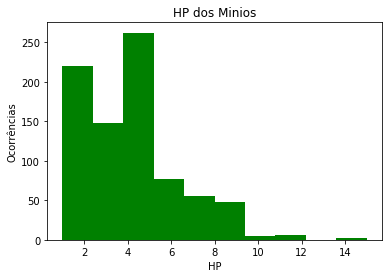

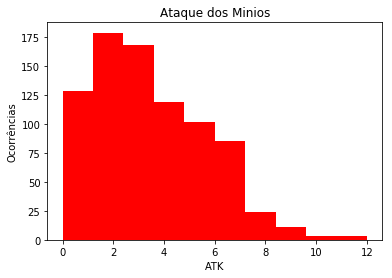

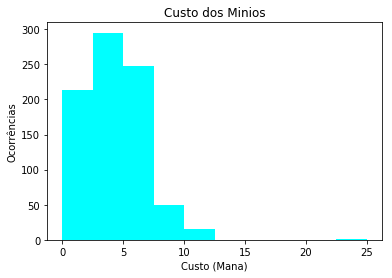

In [5]:
plt.hist(monster_cards.health, color= "green", histtype="bar")
plt.title("HP dos Minios")
plt.xlabel("HP")
plt.ylabel("Ocorrências")
plt.savefig("graphs/hist/cards_heath.png",dpi=300)
plt.show()

plt.hist(monster_cards.attack, color= "red", histtype="bar")
plt.title("Ataque dos Minios")
plt.xlabel("ATK")
plt.ylabel("Ocorrências")
plt.savefig("graphs/hist/cards_attack.png",dpi=300)
plt.show()

plt.hist(monster_cards.cost, color= "cyan", histtype="bar")
plt.title("Custo dos Minios")
plt.xlabel("Custo (Mana)")
plt.ylabel("Ocorrências")
plt.savefig("graphs/hist/cards_cost.png",dpi=300)
plt.show()

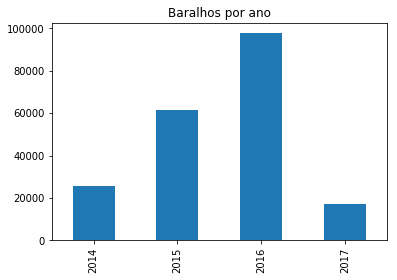

In [6]:
year_count.sort_index().plot.bar(title='Baralhos por ano', legend=None)
plt.savefig("graphs/misc/baralhos_ano.png", dpi=300)
plt.show()


<h4><strong>Gráfico de Barras</strong></h4>

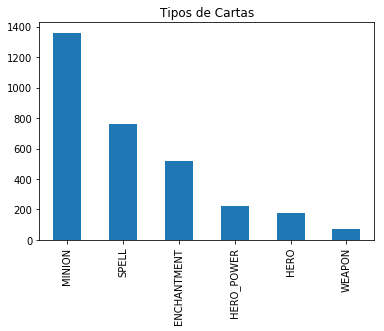

In [7]:
card_types_count.plot.bar(title='Tipos de Cartas', legend=None)
plt.savefig("graphs/misc/card_types.png", dpi=300)
plt.show()

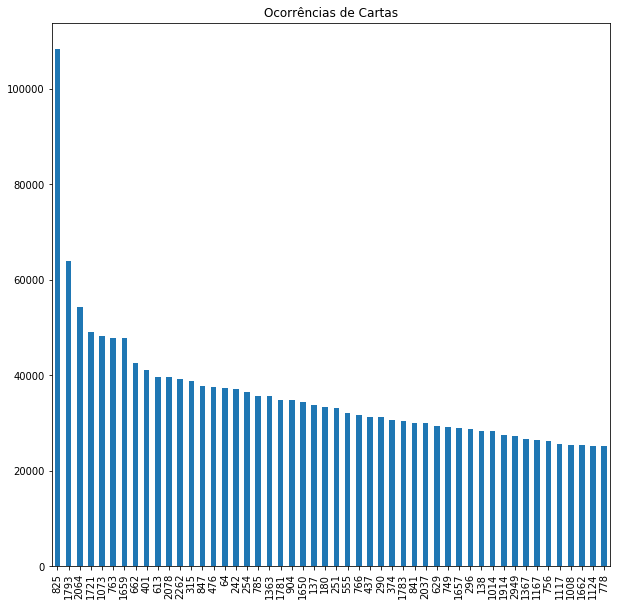

In [8]:
cartas = []
for f in range(30):
     cartas.extend(decks['card_'+ str(f)])
        
dados= {'carta_id': cartas}
cartas_comuns = pandas.DataFrame(dados)
ccc = cartas_comuns['carta_id'].value_counts()
ccc[:50].plot.bar(figsize = (10,10), title='Ocorrências de Cartas')
plt.savefig("graphs/misc/cards_count.png", dpi=300)
plt.show()



In [51]:
cards_in_decks = pandas.DataFrame(ccc, index=ccc.index)
cards_in_decks = cards_in_decks.rename(columns={"carta_id": "n_featured"})
cards_in_decks.describe()
# sns.distplot(cards_in_decks.n_featured, hist=True, kde=True, bins=10, color='green')
cards_in_decks.index

Int64Index([  825,  1793,  2064,  1721,  1073,   763,  1659,   662,   401,
              613,
            ...
            40700, 38522,  2585, 40745, 40951, 40931, 40950, 40337, 40611,
            40928],
           dtype='int64', length=1054)

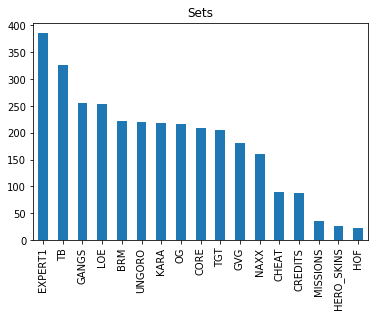

In [10]:
card_sets_count = card_info['set'].value_counts()
card_sets_count.plot.bar(title='Sets', legend=None)
plt.savefig("graphs/misc/card_sets.png", dpi=300)
plt.show()

# < 700 = Lixo
# >=700 e < 2100 = Regular/ruin
# >=2100 e <6740 = Bom
# >= 6740 = CELOCO


<h4>Boxplot</h4>

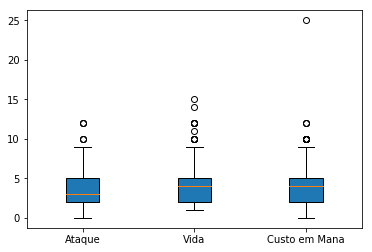

In [11]:
box_card_info = plt.boxplot([monster_cards['attack'], monster_cards['health'], monster_cards['cost']], labels=['Ataque', 'Vida', 'Custo em Mana'], patch_artist=True)


<h4>Pizza</h4>

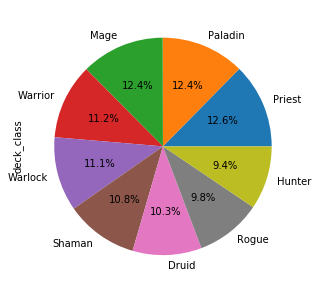

In [12]:
class_count.plot.pie(autopct='%.1f%%', figsize=(5,5))

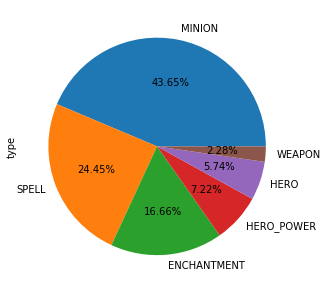

In [13]:
card_types_count.plot.pie(autopct='%.2f%%', figsize=(5,5))

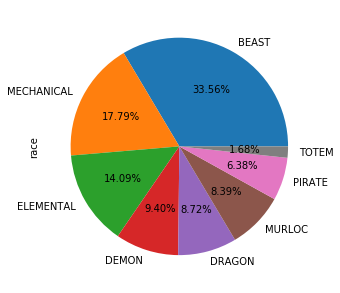

In [14]:
monster_cards_race.plot.pie(autopct='%.2f%%', figsize=(5,5))

<h4>Bubble</h4>

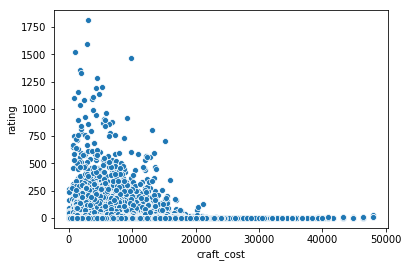

In [15]:
sns.scatterplot(decks_with_rating.craft_cost, decks_with_rating.rating)

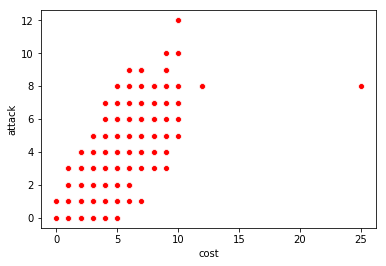

In [16]:
sns.scatterplot(monster_cards.cost, monster_cards.attack, color="red")

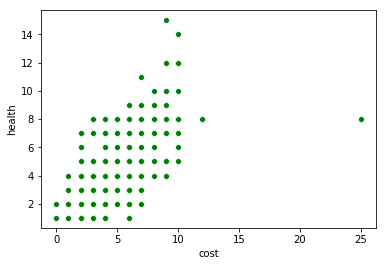

In [17]:
sns.scatterplot(monster_cards.cost, monster_cards.health, color="green")

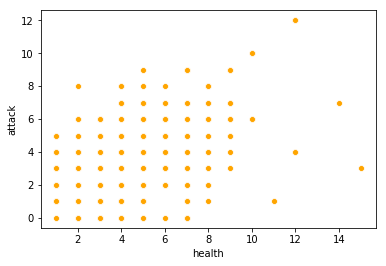

In [18]:
sns.scatterplot(monster_cards.health, monster_cards.attack, color="orange")

<h4>Média, Desvio Padrão e Teste de Hipótese</h4>

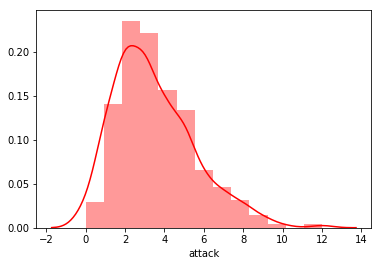

In [19]:
sns.distplot(monster_cards['attack'], hist=True, kde=True, bins=13, color="red")

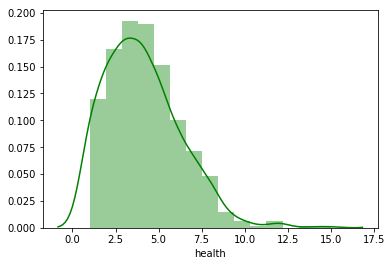

In [20]:
sns.distplot(monster_cards['health'], hist=True, kde=True, bins=15, color="green")

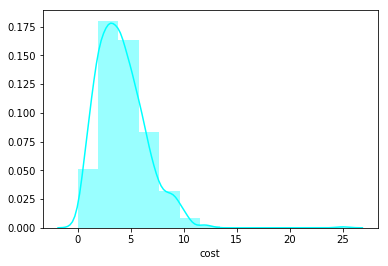

In [21]:
sns.distplot(monster_cards['cost'], hist=True, kde=True, bins=13, color="cyan")

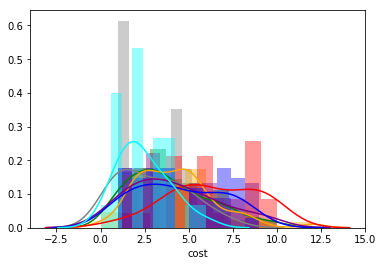

In [22]:
sns.distplot(monster_cards[filter_beast_monsters].cost, hist=True, kde=True, bins=10, color='green')
sns.distplot(monster_cards[filter_pirate_monsters].cost, hist=True, kde=True, bins=10, color='gray')
sns.distplot(monster_cards[filter_mechanical_monsters].cost, hist=True, kde=True, bins=10, color='orange')
sns.distplot(monster_cards[filter_dragon_monsters].cost, hist=True, kde=True, bins=10, color='red')
sns.distplot(monster_cards[filter_demon_monsters].cost, hist=True, kde=True, bins=10, color='purple')
sns.distplot(monster_cards[filter_elemental_monsters].cost, hist=True, kde=True, bins=10, color='blue')
sns.distplot(monster_cards[filter_murloc_monsters].cost, hist=True, kde=True, bins=10, color='cyan')
# sns.distplot(monster_cards[filter_totem_monsters].cost, hist=True, kde=True, bins=10, color='brown')
# monster_cards[filter_totem_monsters].describe()

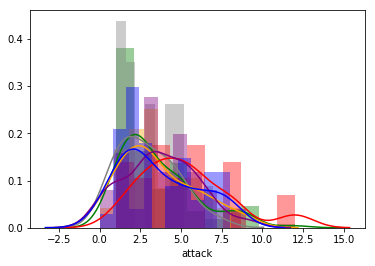

In [23]:
sns.distplot(monster_cards[filter_beast_monsters].attack, hist=True, kde=True, bins=10, color='green')
sns.distplot(monster_cards[filter_pirate_monsters].attack, hist=True, kde=True, bins=10, color='gray')
sns.distplot(monster_cards[filter_mechanical_monsters].attack, hist=True, kde=True, bins=10, color='orange')
sns.distplot(monster_cards[filter_dragon_monsters].attack, hist=True, kde=True, bins=10, color='red')
sns.distplot(monster_cards[filter_demon_monsters].attack, hist=True, kde=True, bins=10, color='purple')
sns.distplot(monster_cards[filter_elemental_monsters].attack, hist=True, kde=True, bins=10, color='blue')
# sns.distplot(monster_cards[filter_murloc_monsters].attack, hist=True, kde=True, bins=10, color='cyan')
# sns.distplot(monster_cards[filter_totem_monsters].attack, hist=True, kde=True, bins=10, color='brown')
# monster_cards[filter_totem_monsters].describe()

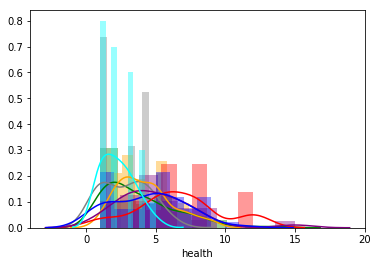

In [24]:
sns.distplot(monster_cards[filter_beast_monsters].health, hist=True, kde=True, bins=10, color='green')
sns.distplot(monster_cards[filter_pirate_monsters].health, hist=True, kde=True, bins=10, color='gray')
sns.distplot(monster_cards[filter_mechanical_monsters].health, hist=True, kde=True, bins=10, color='orange')
sns.distplot(monster_cards[filter_dragon_monsters].health, hist=True, kde=True, bins=10, color='red')
sns.distplot(monster_cards[filter_demon_monsters].health, hist=True, kde=True, bins=10, color='purple')
sns.distplot(monster_cards[filter_elemental_monsters].health, hist=True, kde=True, bins=10, color='blue')
sns.distplot(monster_cards[filter_murloc_monsters].health, hist=True, kde=True, bins=10, color='cyan')
# sns.distplot(monster_cards[filter_totem_monsters].health, hist=True, kde=True, bins=10, color='brown')
# monster_cards[filter_totem_monsters].describe()

<h4>Naive Bayes </h4>

In [25]:
card_info['rarity'].value_counts()

features = ['attack', 'cardClass', 'classes', 'collectible', 'cost', 'dbfId',
       'durability', 'health', 'id', 'mechanics', 'name', 'overload',
       'playRequirements', 'race', 'referencedTags', 'set',
       'spellDamage', 'targetingArrowText', 'text', 'type']

d = defaultdict(LabelEncoder)
encoded_card_info = card_info.astype(str).apply(lambda x: d[x.name].fit_transform(x))

x_treino, x_teste,y_treino, y_teste = train_test_split(encoded_card_info[features], encoded_card_info['rarity'], test_size=0.5)
modelo = GaussianNB()
modelo.fit(x_treino, y_treino)

y_predict = modelo.predict(x_teste)
print("Accuracy:",metrics.accuracy_score(y_teste, y_predict))

Accuracy: 0.5516356638871072


<h4>Árvore de Decisão</h4>

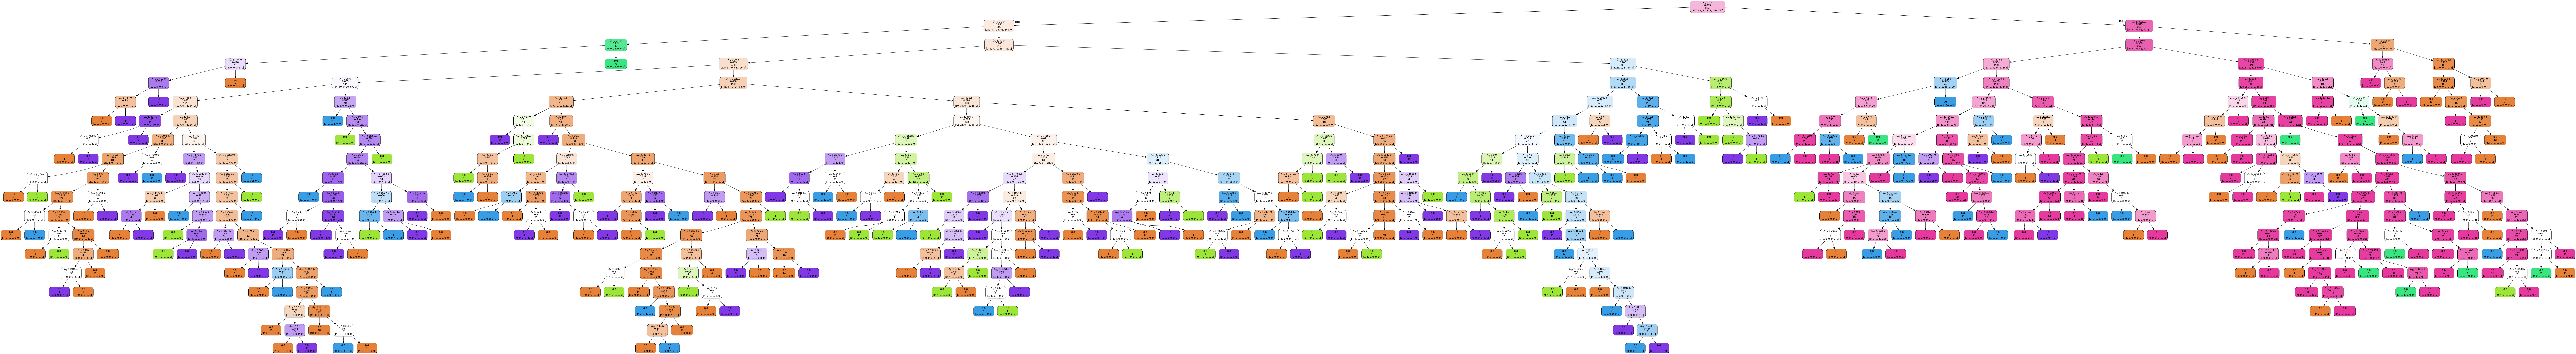

In [26]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_treino, y_treino)

dot_data = tree.export_graphviz(clf, out_file=None, filled=True, special_characters=True, rounded=True, label=all) 
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

<h4><strong>Conclusão</strong></h4>
       <br> É possivel integrar o Python com frameworks para Web (como Django ou Flask) e com outras linguagens (como Javascript), o que aumenta as possibilidades de desenvolvimento. Além disso, existem diversas bibliotecas disponíveis para análise de dados. Este pacote inclui diversas utilidades, entre elas o Pandas, Numpy, Holoviews. Além disso, por ser mais antigo, Python é mais robusto e menos propenso a mudanças drásticas. 
    <br>  Python é uma linguagem de propósito geral bem estabelecida, ao contrário do R que é uma linguagem mais especializada e do Júlia que é uma linguagem relativamente nova, sendo assim a experiência adiquirida terá um maior potêncial de uso em aplicações futuras, seja em outros trabalhos ou no mercado.
    <br> Apesar da deficiência do Python para programação paralela, acreditamos que a facilidade de codificar usando a linguagem trará uma vantagem mais significativa do que tempo de execução e mais liberdade para focar na análise dos dados, sem se preocupar com aprender as nuances de uma nova linguagem.
    <br> Existem também uma biblioteca para rodar código R em python caso alguma funcionalidade específica do R seja necessária.

# Referências:

<br>https://www.kaggle.com/romainvincent/history-of-hearthstone/data
<br>https://www.python.org
<br>https://books.google.com.br/books?hl=pt-BR&lr=&id=v3n4_AK8vu0C&oi=fnd&pg=PR3&dq=python+for+data+analysis&ots=rgJL4hyrqx&sig=v6onow7Ag9Qs4S11awiGeHLpSd4#v=onepage&q&f=false
<br>http://www.cienciaedados.com/por-que-cientistas-de-dados-escolhem-python/
<br>https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python    
https://hackncast.org/v06-python
<br>https://minerandodados.com.br/por-que-o-python-e-a-linguagem-mais-adotada-na-area-de-data-science/
<br>Wes McKinney Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython (2012)
<br>https://cio.com.br/julia-vs-python-qual-e-a-melhor-para-a-ciencia-de-dados/
<br>http://datascienceacademy.com.br/blog/top-20-bibliotecas-python-para-data-science/

<br>https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/


In [27]:

#url = "https://..."
#s= requests.get(url).content #Puxa uma url da rede 
#c= pd.read_csv(io.StringIO(s.decode('utf-8'))) #Puxa um dataset da url

#FICO BUNITO MAIS DEU BOSTA
#for x in arquivos:
#    dataset = pandas.read_csv('/home/' + str(user) + '/Downloads/datasets/' + str(x))
#    lista_temp = {
#    
#        'nome': x,
#        'dataset': dataset,
#    }
#    lista_datasets.append(lista_temp)

# print(league_of_legends) 
# league = league_of_legends[["League", "bResult"]] #Dois Colchetes = Selecionar linhas e colunas de um único dataset
# print(league)
#league_of_legends.loc[0] # Seleciona uma Linha do dataset
# league_of_legends.iloc[0] # Seleciona uma Linha do dataset
# league_of_legends.loc[[0]] # Seleciona uma Linha do dataset
# league_of_legends.iloc[[0]] # Seleciona uma Linha do dataset

# league_of_legends_nalcs_btag = league
# league_nalcs_2015 = league_nalcs and league_2015
# # print(league_nalcs)
# print(league_of_legends[league_nalcs_2015])

In [28]:
# x = numpy.linspace(0, 2, 100)

# plt.plot(x, x, label='linear')
# plt.plot(x, x**2, label='quadratic')
# plt.plot(x, x**3, label='cubic')
# plt.xlabel('x label')
# plt.ylabel('y label')
# plt.title("Simple Plot")
# plt.legend()
# plt.show()


In [29]:
# lista = []
# lista_temp = {}
# for x in range(0,(len(data))):
#     for i in range(0,1):
#         lista_temp = (data.get_value(x, 'card_' + str(i)))
#     lista.append(lista_temp)
# print('cabei')


# for x in range(len(data)):
#     list_temp = {
#         'card'+str(0) : data.at[x, 'card_'+str(0)],
#         'card'+str(1) : cards.at[x, 'card_'+str(1)],
#         'card'+str(2) : cards.at[x, 'card_'+str(2)],
#         'card'+str(3) : cards.at[x, 'card_'+str(3)],
#         'card'+str(4) : cards.at[x, 'card_'+str(4)],
#         'card'+str(5) : cards.at[x, 'card_'+str(5)],
#         'card'+str(6) : cards.at[x, 'card_'+str(6)],
#         'card'+str(7) : cards.at[x, 'card_'+str(7)],
#         'card'+str(8) : cards.at[x, 'card_'+str(8)],
#         'card'+str(9) : cards.at[x, 'card_'+str(9)],
#         'card'+str(10) : cards.at[x, 'card_'+str(10)],
#         'card'+str(11) : cards.at[x, 'card_'+str(11)],
#         'card'+str(12) : cards.at[x, 'card_'+str(12)],
#         'card'+str(13) : cards.at[x, 'card_'+str(13)],
#         'card'+str(14) : cards.at[x, 'card_'+str(14)],
#         'card'+str(15) : cards.at[x, 'card_'+str(15)],
#         'card'+str(16) : cards.at[x, 'card_'+str(16)],
#         'card'+str(17) : cards.at[x, 'card_'+str(17)],
#         'card'+str(18) : cards.at[x, 'card_'+str(18)],    
#         'card'+str(19) : cards.at[x, 'card_'+str(19)],
#         'card'+str(20) : cards.at[x, 'card_'+str(20)],
#         'card'+str(21) : cards.at[x, 'card_'+str(21)],
#         'card'+str(22) : cards.at[x, 'card_'+str(22)],    
#         'card'+str(23) : cards.at[x, 'card_'+str(23)],
#         'card'+str(24) : cards.at[x, 'card_'+str(24)],
#         'card'+str(25) : cards.at[x, 'card_'+str(25)],
#         'card'+str(26) : cards.at[x, 'card_'+str(26)],
#         'card'+str(27) : cards.at[x, 'card_'+str(27)],
#         'card'+str(28) : cards.at[x, 'card_'+str(28)],
#         'card'+str(29) : cards.at[x, 'card_'+str(29)],
#     }
#     decks.append(list_temp)   

# import math
# 
# lista_temp = []
# lista = []
# for x in range(0,(math.trunc(len(data)/100))):
#     for i in range(0,30):
#         lista_temp.append(data.get_value(x, 'card_' + str(i)))
#     lista.append(lista_temp)
# print(lista)

In [30]:
# clf = tree.DecisionTreeRegressor()
# clf.fit(x_treino, y_treino)

# dot_data = tree.export_graphviz(clf, out_file=None, filled=True, special_characters=True, rounded=True) 
# graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
# Image(graph.create_png())

In [31]:
encoded_card_info['classes'].value_counts()

3    3108
1       3
2       3
0       3
Name: classes, dtype: int64

In [32]:
encoded_card_info['rarity'].value_counts()


5    1519
0     572
3     344
4     314
1     193
2     175
Name: rarity, dtype: int64

In [53]:
cards_in_decks
card_info

cards_in_decks_info = pandas.merge(card_info, cards_in_decks, how="right",on=["dbfId","ID"])

NameError: name 'index' is not defined

In [ ]:
cards_in_decks_info



In [49]:
# 0-COMMON-LARANJA 1-EPIC-VERDE 2-FREE-(VERDIAGUA) 3-LEGENDARY-AZUL 4-RARE-ROXO 5-?-ROSA
cards_in_decks.index

Int64Index([  825,  1793,  2064,  1721,  1073,   763,  1659,   662,   401,
              613,
            ...
            40700, 38522,  2585, 40745, 40951, 40931, 40950, 40337, 40611,
            40928],
           dtype='int64', length=1054)

In [48]:
type(ccc)

pandas.core.series.Series